In [1]:
from fastai.vision import *


In [2]:
folders=[]
folders.append('Charmender')
folders.append('Charizard')

folders.append('Squirtle')
folders.append('Blastoise')

folders.append('Bulbasaur')
folders.append('Venusaur')
files=[]
files.append('Charmender.csv')
files.append('Charizard.csv')

files.append('Squirtle.csv')
files.append('Blastoise.csv')

files.append('Bulbasaur.csv')
files.append('Venusaur.csv')



In [16]:
path=Path('data/Pokemon')
for folder in folders:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

In [3]:
path=Path('data/Pokemon')
i=0
for folder in folders:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    st=os.path.join(dest, files[i])
    download_images(st, dest, max_pics=250)
    i+=1

path.ls()
classes = ['Charmender','Charizard','Squirtle','Blastoise','Bulbasaur','Venusaur']

In [4]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500,max_workers=6)


Charmender


Charizard


Squirtle


Blastoise


Bulbasaur


Venusaur


In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0,bs=32).normalize(imagenet_stats)


(['Blastoise', 'Bulbasaur', 'Charizard', 'Charmender', 'Squirtle', 'Venusaur'],
 6,
 1417,
 354)

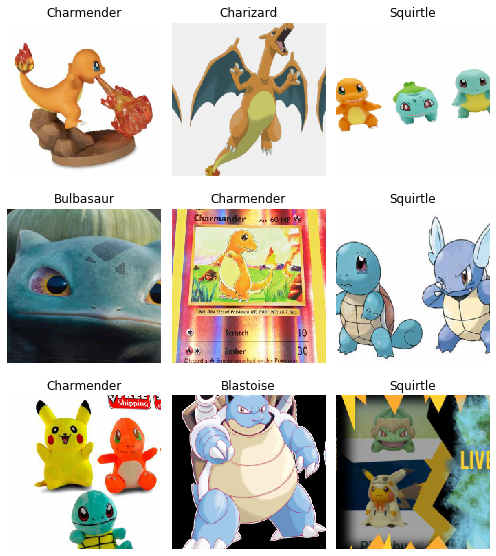

In [7]:
data.show_batch(rows=3, figsize=(7,8))
data.classes, data.c, len(data.train_ds), len(data.valid_ds)



In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [9]:
learn.fit_one_cycle(5)


epoch,train_loss,valid_loss,error_rate,time
0,1.699000,0.796589,0.228814,00:49
1,1.234200,0.838554,0.206215,00:42
2,0.953811,0.749993,0.200565,00:42
3,0.697274,0.690495,0.192090,00:42
4,0.561447,0.703125,0.192090,00:42


In [10]:
learn.save('stage-1')

In [11]:
learn.unfreeze()


In [12]:
learn.lr_find(start_lr=3e-5, end_lr=3e-4)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


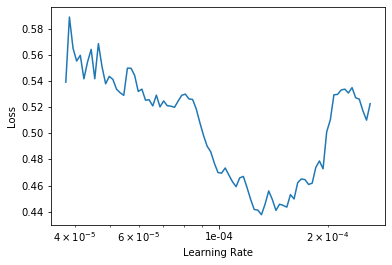

In [13]:
learn.recorder.plot()


In [15]:
learn.fit_one_cycle(5, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.315146,0.707981,0.172316,00:45
1,0.325524,0.676932,0.158192,00:45
2,0.285662,0.725498,0.183616,00:44
3,0.224219,0.708381,0.161017,00:43
4,0.182726,0.702686,0.169492,00:44


In [16]:
learn.save('stage-2')



FileNotFoundError: [Errno 2] No such file or directory: 'data\\Pokemon\\models\\stage-2.pth'

In [ ]:
learn.load('stage-2');

In [17]:
interp = ClassificationInterpretation.from_learner(learn)


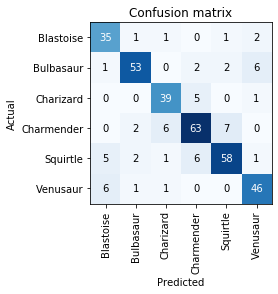

In [18]:
interp.plot_confusion_matrix()